In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [2]:
tr=pd.read_csv('train.csv')

In [3]:
tr.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [4]:
ts=pd.read_csv('test.csv')

In [5]:
ts.drop('Unnamed: 0',
  axis='columns', inplace=True)

# Preprocessing

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpustr = []
for i in range(0, len(tr)):
    review = re.sub('[^a-zA-Z]', ' ', tr['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [WordNetLemmatizer().lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpustr.append(review)

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpusts = []
for i in range(0, len(ts)):
    review = re.sub('[^a-zA-Z]', ' ', ts['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [WordNetLemmatizer().lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpusts.append(review)

In [8]:
vect = TfidfVectorizer(ngram_range = (1,4), lowercase=True).fit(corpustr)

In [9]:
vect_transformed_X_train = vect.transform(corpustr)
vect_transformed_X_test = vect.transform(corpusts)

In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

# SVM

In [11]:
modelSVC = SVC(C=100).fit(vect_transformed_X_train,tr['label'])

In [12]:
predictionsSVC = modelSVC.predict(vect_transformed_X_test)
sum(predictionsSVC==1),len(ts['Label']),f1_score(ts['Label'],predictionsSVC)

(125, 200, 0.7111111111111111)

In [13]:
from sklearn import metrics
score = metrics.accuracy_score(ts['Label'], predictionsSVC)
score

0.675

Recall score : 80.000000
Precision score : 64.000000
ROC score : 67.500000



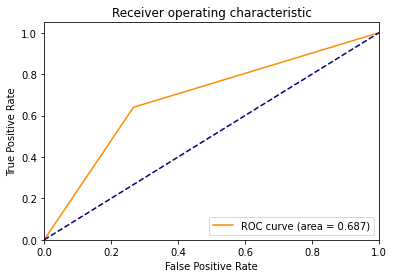

In [14]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
print("Recall score : %f" %(recall_score(ts['Label'], predictionsSVC) * 100))
print("Precision score : %f" %(precision_score(ts['Label'], predictionsSVC) * 100))
print("ROC score : %f\n" %(roc_auc_score(ts['Label'], predictionsSVC) * 100))

import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictionsSVC, ts['Label'])
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [15]:
modelLR = LogisticRegression(C=100).fit(vect_transformed_X_train,tr['label'])


In [16]:
predictionsLR = modelLR.predict(vect_transformed_X_test)
sum(predictionsLR==1),len(ts['Label']),f1_score(ts['Label'],predictionsLR)

(129, 200, 0.6986899563318777)

In [17]:
from sklearn import metrics
score = metrics.accuracy_score(ts['Label'], predictionsLR)
score

0.655

Recall score : 80.000000
Precision score : 62.015504
ROC score : 65.500000



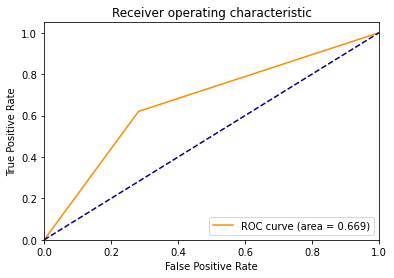

In [18]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
print("Recall score : %f" %(recall_score(ts['Label'], predictionsLR) * 100))
print("Precision score : %f" %(precision_score(ts['Label'], predictionsLR) * 100))
print("ROC score : %f\n" %(roc_auc_score(ts['Label'], predictionsLR) * 100))

import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictionsLR, ts['Label'])
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Multinomial

In [19]:
modelNB = MultinomialNB(alpha=1.7).fit(vect_transformed_X_train,tr['label'])


In [20]:
predictionsNB = modelNB.predict(vect_transformed_X_test)
sum(predictionsNB==1),len(ts['Label']),f1_score(ts['Label'],predictionsNB)

(113, 200, 0.6948356807511737)

Recall score : 74.000000
Precision score : 65.486726
ROC score : 67.500000



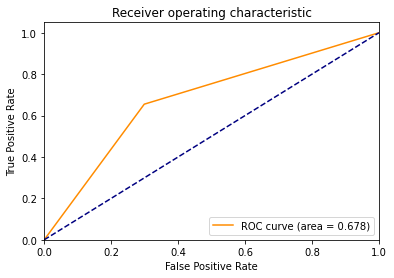

In [21]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
print("Recall score : %f" %(recall_score(ts['Label'], predictionsNB) * 100))
print("Precision score : %f" %(precision_score(ts['Label'], predictionsNB) * 100))
print("ROC score : %f\n" %(roc_auc_score(ts['Label'], predictionsNB) * 100))

import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictionsNB, ts['Label'])
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RandomForest

In [22]:
modelRF = RandomForestClassifier(n_estimators=20).fit(vect_transformed_X_train,tr['label'])

In [23]:
predictionsRF = modelRF.predict(vect_transformed_X_test)
sum(predictionsRF==1),len(ts['Label']),f1_score(ts['Label'],predictionsRF)

(102, 200, 0.6732673267326733)

Recall score : 68.000000
Precision score : 66.666667
ROC score : 67.000000



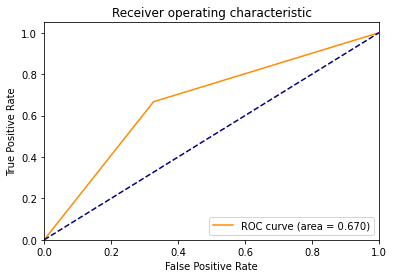

In [24]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
print("Recall score : %f" %(recall_score(ts['Label'], predictionsRF) * 100))
print("Precision score : %f" %(precision_score(ts['Label'], predictionsRF) * 100))
print("ROC score : %f\n" %(roc_auc_score(ts['Label'], predictionsRF) * 100))

import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictionsRF, ts['Label'])
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# ModelSGD

In [25]:
modelSGD = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(vect_transformed_X_train,tr['label'])

In [26]:
predictionsSGD = modelSGD.predict(vect_transformed_X_test)
sum(predictionsSGD==1),len(ts['Label']),f1_score(ts['Label'],predictionsSGD)

(132, 200, 0.706896551724138)

Recall score : 82.000000
Precision score : 62.121212
ROC score : 66.000000



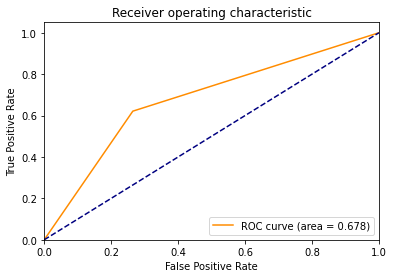

In [27]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
print("Recall score : %f" %(recall_score(ts['Label'], predictionsSGD) * 100))
print("Precision score : %f" %(precision_score(ts['Label'], predictionsSGD) * 100))
print("ROC score : %f\n" %(roc_auc_score(ts['Label'], predictionsSGD) * 100))

import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictionsSGD, ts['Label'])
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()